# Exploratory Data Analysis

In this notebook, we implement exploratory data analysis (EDA) to help us have a better sense for building a traffic prediction model.

First, we import some necessary packages.

- `polars`: A more efficient third-party package for processing massive data than `pandas`.
- `os`: Help us to get the raw tables.
- `feather`: All the raw tables are saved in `.feather`. This package can help us read the `.feather` files.
- `matplotlib`: For data visualization.

In [1]:
import polars as pl
import os
import feather
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150
%matplotlib inline

## Read raw tables

In [2]:
rawDf = []
for filename in os.listdir('./nfb2023'):
    monthlyDf = pl.from_pandas(feather.read_dataframe(f"./nfb2023/{filename}"))
    if (len(rawDf) == 0):
        rawDf.append(monthlyDf)
    else:
        currDf = pl.concat(rawDf)
        monthlyDf = monthlyDf.filter(pl.col('VDID').is_in(set(currDf['VDID'])))
        rawDf.append(monthlyDf)
rawDf = pl.concat(rawDf)
rawDf

VDID,RoadName,Start,End,RoadDirection,Speed,Occupancy,Volume,ActualLaneNum,LocationMile,isTunnel,DataCollectTime
str,str,str,str,str,f64,f64,f64,i64,f64,i64,datetime[ns]
"""VD-N5-N-0.178-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",-99.0,-99.0,-99.0,2,0.178,0,2023-01-01 00:04:00
"""VD-N5-N-0.706-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",-99.0,-99.0,-99.0,2,0.706,0,2023-01-01 00:04:00
"""VD-N5-N-1.068-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",-99.0,-99.0,-99.0,2,1.068,1,2023-01-01 00:04:00
"""VD-N5-N-2.068-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",94.6,4.1,53.0,2,2.068,1,2023-01-01 00:04:00
"""VD-N5-N-3.198-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",90.8,4.8,51.0,2,3.198,1,2023-01-01 00:04:00
…,…,…,…,…,…,…,…,…,…,…,…
"""VD-N5-S-41.298…","""國道5號""","""宜蘭交流道""","""羅東交流道""","""S""",105.7,1.7,26.0,2,41.298,0,2023-12-31 23:54:00
"""VD-N5-S-44.202…","""國道5號""","""宜蘭交流道""","""羅東交流道""","""S""",98.5,2.5,38.0,2,44.202,0,2023-12-31 23:54:00
"""VD-N5-S-46.566…","""國道5號""","""宜蘭交流道""","""羅東交流道""","""S""",79.4,1.2,18.0,2,46.566,0,2023-12-31 23:54:00


## Eliminate outliers

We eliminate the outliers according to the following rule of thumb.

1. Remove the invalid values (-99).
2. The average speed should be under 120 kph. (In Freeway No.5, the highest speed limit is 90kph.)
3. The total volume in 5 minutes should be under (3200/12) vph. (The theoretical maximal capacity in Freeway No.5 might be about 3200 vph)

* Note that the highway capacity varies in different sections, it can be affected by several factors, like the geometry of highways, inside or outside the tunnel, etc.

In [3]:
filtDf = rawDf.filter((pl.col('Volume')>=0) & (pl.col('Speed')>=0) & (pl.col('Occupancy')>=0) & (pl.col('Speed')<=120) & (pl.col('Volume')<=3200/12))
filtDf

VDID,RoadName,Start,End,RoadDirection,Speed,Occupancy,Volume,ActualLaneNum,LocationMile,isTunnel,DataCollectTime
str,str,str,str,str,f64,f64,f64,i64,f64,i64,datetime[ns]
"""VD-N5-N-2.068-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",94.6,4.1,53.0,2,2.068,1,2023-01-01 00:04:00
"""VD-N5-N-3.198-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",90.8,4.8,51.0,2,3.198,1,2023-01-01 00:04:00
"""VD-N5-N-9.840-…","""國道5號""","""石碇交流道""","""坪林交控交流道""","""N""",86.1,2.7,38.0,2,9.84,1,2023-01-01 00:04:00
"""VD-N5-N-11.903…","""國道5號""","""石碇交流道""","""坪林交控交流道""","""N""",86.1,2.3,32.0,2,11.903,1,2023-01-01 00:04:00
"""VD-N5-N-14.550…","""國道5號""","""石碇交流道""","""坪林交控交流道""","""N""",88.0,2.7,34.0,2,14.55,0,2023-01-01 00:04:00
…,…,…,…,…,…,…,…,…,…,…,…
"""VD-N5-S-41.298…","""國道5號""","""宜蘭交流道""","""羅東交流道""","""S""",105.7,1.7,26.0,2,41.298,0,2023-12-31 23:54:00
"""VD-N5-S-44.202…","""國道5號""","""宜蘭交流道""","""羅東交流道""","""S""",98.5,2.5,38.0,2,44.202,0,2023-12-31 23:54:00
"""VD-N5-S-46.566…","""國道5號""","""宜蘭交流道""","""羅東交流道""","""S""",79.4,1.2,18.0,2,46.566,0,2023-12-31 23:54:00


## Categorized different road types

There are several factors affecting the highway capacity. Based on the data we collected, we chose two factors: the number of lanes and whether the road section belonged to the tunnel.

In Freeway No.5, the number of lanes either two or three. Hence, we have 2x2=4 categories.

* Note: `isTunnel` = 1 means the road section belonged to the tunnel, and `isTunnel` = 0 represents the basic section.

In [4]:
roadType1 = filtDf.filter((pl.col('ActualLaneNum')==3) & (pl.col('isTunnel')==0))
roadType2 = filtDf.filter((pl.col('ActualLaneNum')==3) & (pl.col('isTunnel')==1))
roadType3 = filtDf.filter((pl.col('ActualLaneNum')==2) & (pl.col('isTunnel')==0))
roadType4 = filtDf.filter((pl.col('ActualLaneNum')==2) & (pl.col('isTunnel')==1))

## Q-V Diagram

Q-V diagram is a part of the fundamental diagram. __The fundamental diagram__ is composed of Q-K, Q-V, and K-V diagrams, respectively representing the relationship between volume and density, volume and speed, and speed and density.

We plot the Q-V diagram to visualize the relationship between the volume and the speed, trying to find the potential capacity. Then, we can refer to the inferred capacity to scale the volume data before feeding it to the prediction model.

According to the Q-V diagram plotted below, we assume the capacity of Freeway No.5 in 5 minutes is about 240 vehicles. 

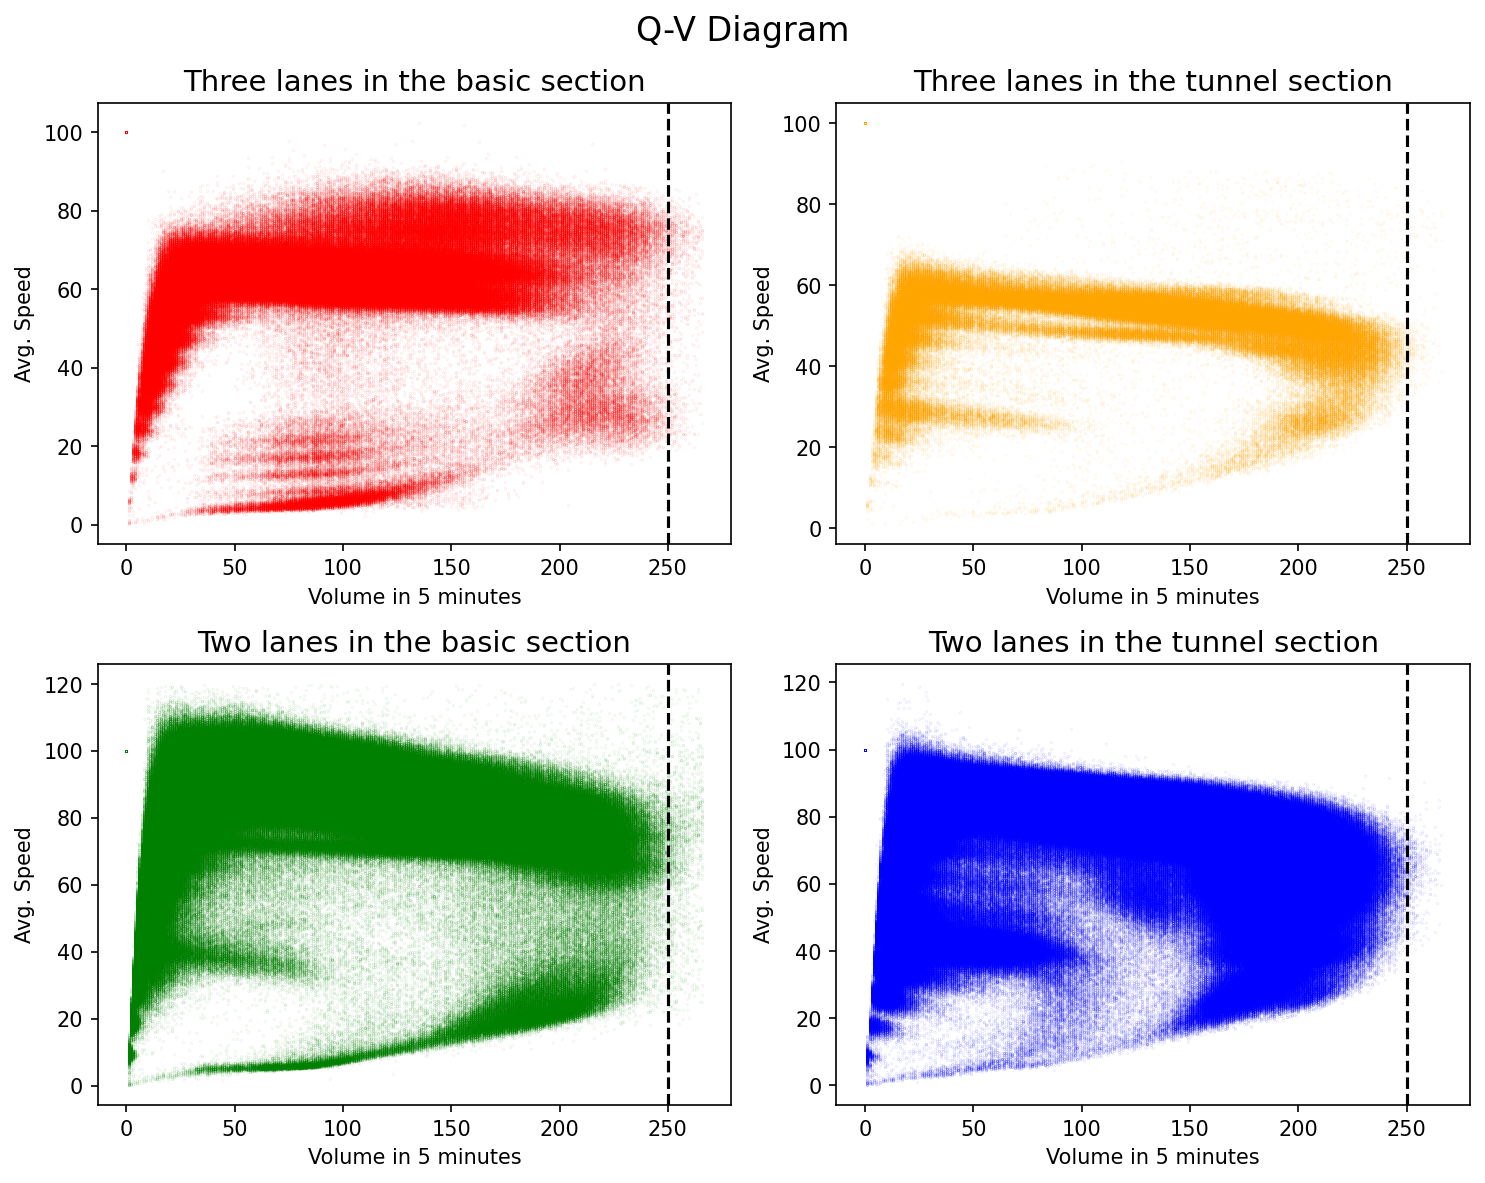

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].scatter(roadType1['Volume'], roadType1['Speed'], s=0.001, color='red')
ax[0, 0].axvline(x=250, color='black', linestyle='--')
ax[0, 0].set_title('Three lanes in the basic section', fontsize=14)
ax[0, 0].set_xlabel('Volume in 5 minutes', fontsize=10)
ax[0, 0].set_ylabel('Avg. Speed', fontsize=10)

ax[0, 1].scatter(roadType2['Volume'], roadType2['Speed'], s=0.001, color='orange')
ax[0, 1].axvline(x=250, color='black', linestyle='--')
ax[0, 1].set_title('Three lanes in the tunnel section', fontsize=14)
ax[0, 1].set_xlabel('Volume in 5 minutes', fontsize=10)
ax[0, 1].set_ylabel('Avg. Speed', fontsize=10)

ax[1, 0].scatter(roadType3['Volume'], roadType3['Speed'], s=0.001, color='green')
ax[1, 0].axvline(x=250, color='black', linestyle='--')
ax[1, 0].set_title('Two lanes in the basic section', fontsize=14)
ax[1, 0].set_xlabel('Volume in 5 minutes', fontsize=10)
ax[1, 0].set_ylabel('Avg. Speed', fontsize=10)

ax[1, 1].scatter(roadType4['Volume'], roadType4['Speed'], s=0.001, color='blue')
ax[1, 1].axvline(x=250, color='black', linestyle='--')
ax[1, 1].set_title('Two lanes in the tunnel section', fontsize=14)
ax[1, 1].set_xlabel('Volume in 5 minutes', fontsize=10)
ax[1, 1].set_ylabel('Avg. Speed', fontsize=10)

plt.suptitle('Q-V Diagram', fontsize=16)
plt.tight_layout()